# AnaStarPhotometryFactory

- creation date : July 4th 2019
- author Sylvie Dagoret

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

import numpy as np

from scipy.interpolate import interp1d

from astropy.time import Time


In [210]:
from astropy.table import Table,QTable

In [211]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(10,10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Import Data

In [212]:
t = Table.read('out_starphotometryfactory/table_starphotometry.ecsv', format='ascii.ecsv')

In [213]:
t[:5]

idx,Npixcirc,fracpixcirc,sigcirc,errstatcirc,errannul,sigx,sigy,bkgsum,bkgaverpix,bkgstddevpix,airmass,x0,y0,date,file
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,object,str117
0,1935,0.9855,2.779e+06,760.9,2.533e+04,4.709,4.541,185746.69,94.6,13.09,1.546,417,90,2019-02-15T22:55:50.730,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red.fit
1,1937,0.9865,2.779e+06,761,2.504e+04,4.938,4.673,183848.64,93.63,12.92,1.543,417,86,2019-02-15T22:56:26.007,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red.fit
2,1932,0.984,2.78e+06,761.1,2.485e+04,4.713,4.556,185718.44,94.59,12.86,1.54,417,87,2019-02-15T22:57:01.284,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red.fit
3,1932,0.984,2.637e+06,741.1,2.523e+04,5.129,4.702,183084.86,93.24,13.06,1.537,467,43,2019-02-15T22:57:36.562,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225736_562_HD116405_Filtre_None_bin1x1.4_red.fit
4,1933,0.9845,2.646e+06,742.5,2.494e+04,5.154,4.46,181000.45,92.18,12.9,1.534,464,43,2019-02-15T22:58:11.838,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red.fit


In [214]:
t["starmag"]=-2.5*np.log10(t["sigcirc"])
t["bkgmag"]=-2.5*np.log10(t["bkgsum"])

t["starmagerr"]=2.5/2.3/t["sigcirc"]*np.sqrt(t["errstatcirc"]**2+t["errannul"]**2)
t["bkgmagerr"]=2.5/2.3/t["bkgsum"]*t["bkgstddevpix"]*2000.

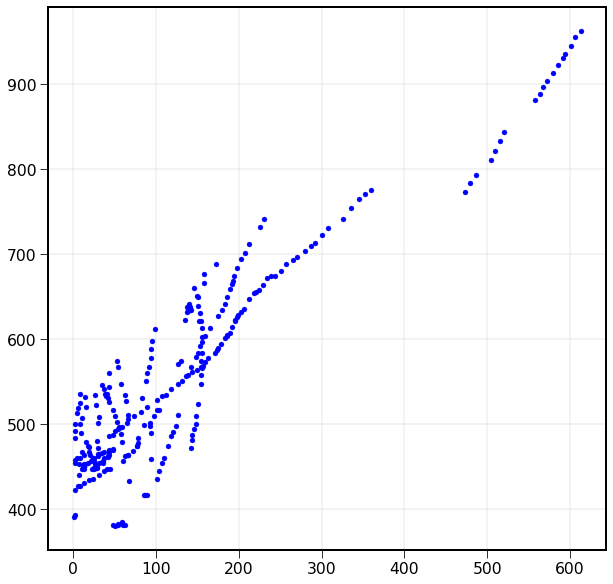

In [215]:
plt.plot(t["y0"],t["x0"],'bo')
plt.grid()

In [216]:
Nobs=len(t)

## Convert in datetime

- necessary for plotting

In [217]:
all_datetime = [Time(d,format='isot', scale='utc').to_datetime()  for d in t["date"]]

## Make color pallet

In [218]:
Nobs = len(all_datetime)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=Nobs)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(Nobs), alpha=1)

In [219]:
len(all_colors)

287

# Filter bad data

In [220]:
badphotometrylist = np.array(
    [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
     82, 83, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
     123, 124, 125,
     187, 195, 202, 237, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
     272, 273,
     316, 317, 234, 326, 345])

In [221]:
badphotometrylist= []

In [222]:
#t.remove_rows(badphotometrylist)

In [223]:
len(t)

287

In [224]:
new_all_colors = [ ]
new_all_datetime = []
for idx in np.arange(Nobs):
    if idx not in badphotometrylist:
        new_all_colors.append(all_colors[idx])
        new_all_datetime.append(all_datetime[idx])
new_all_colors=np.array(new_all_colors)

In [225]:
len(new_all_colors)

287

In [226]:
len(new_all_datetime)

287

# Plot Functions

In [227]:
#---------------------------------------------------------------------------------------------

def PlotXY(ifig,X,Y,XMIN=0,XMAX=2048,YMIN=0,YMAX=2048):
    """

    :param X:
    :param Y:
    :return:
    """

    fig = plt.figure(num=ifig, figsize=(10, 10))

    Nobs = len(X)

    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=Nobs)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(Nobs), alpha=1)

    plt.scatter(X,Y, marker="o", c=all_colors)


    plt.grid(True, color="k")
    plt.xlabel(" X (pixel) ")
    plt.ylabel(" Y (pixel) ")
    plt.title("Star Trajectory")
    plt.xlim(XMIN,XMAX)
    plt.ylim(YMIN,YMAX)
    plt.show()

In [228]:
#---------------------------------------------------------------
def PlotStarmagBkgvsUTC(ifig,all_datetime, all_starmag,all_bkgmag,all_starmag_err,all_bkgmag_err,YMIN=0,YMAX=0):
    """

    :param ifig:
    :param all_airmass:
    :param all_datetime:
    :param all_flag:
    :return:
    """

    fig = plt.figure(num=ifig, figsize=(16, 8))

    Nobs = len(all_datetime)

    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=Nobs)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(Nobs), alpha=1)




    myFmt = mdates.DateFormatter('%d-%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    #plt.scatter(all_datetime, all_airmass, marker="o", c=all_colors)
    plt.scatter(all_datetime, all_starmag, marker="o", c="red",label="star")
    plt.scatter(all_datetime, all_bkgmag, marker="o", c="blue",label="sky bkg")

    plt.errorbar(all_datetime, all_starmag, yerr=all_starmag_err, fmt='o', color="red", ecolor='grey')
    plt.errorbar(all_datetime, all_bkgmag, yerr=all_bkgmag_err, fmt='o', color="blue", ecolor='grey')


    #plt.plot([all_datetime[IDXMINREF], all_datetime[IDXMINREF]], [all_bkgmag.min(), all_bkgmag.max()], "g-")
    #plt.plot([all_datetime[IDXMAXREF], all_datetime[IDXMAXREF]], [all_bkgmag.min(), all_bkgmag.max()], "g-")

    #plt.plot([all_datetime[IDXMINREF], all_datetime[IDXMINREF]], [all_starmag.min(), all_starmag.max()], "g-")
    #plt.plot([all_datetime[IDXMAXREF], all_datetime[IDXMAXREF]], [all_starmag.min(), all_starmag.max()], "g-")

    myFmt = mdates.DateFormatter('%d-%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.gcf().autofmt_xdate()

    plt.xlim(all_datetime[0], all_datetime[-1])
    
    if YMIN!=0 or YMAX!=0:
        plt.ylim(YMIN,YMAX)

    plt.grid(True, color="r")
    plt.xlabel("date (UTC)")
    plt.ylabel("Star/Bkg magnitude (mag)")
    plt.title("Star and Bkg magnitude vs date")
    plt.legend()

    plt.show()


In [229]:
#---------------------------------------------------------------
def PlotStarmagvsUTC(ifig,all_datetime, all_starmag,all_starmag_err,YMIN,YMAX):
    """

    :param ifig:
    :param all_airmass:
    :param all_datetime:
    :param all_flag:
    :return:
    """

    fig = plt.figure(num=ifig, figsize=(16, 8))

    Nobs = len(all_datetime)

    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=Nobs)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(Nobs), alpha=1)


    myFmt = mdates.DateFormatter('%d-%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    #plt.errorbar(all_datetime, all_starmag, yerr=all_starmag_err, fmt='.', color="red", ecolor='grey')
    plt.scatter(all_datetime, all_starmag, marker="o", c=all_colors)


    #plt.plot([all_datetime[IDXMINREF], all_datetime[IDXMINREF]], [all_starmag.min(), all_starmag.max()], "g-")
    #plt.plot([all_datetime[IDXMAXREF], all_datetime[IDXMAXREF]], [all_starmag.min(), all_starmag.max()], "g-")


    myFmt = mdates.DateFormatter('%d-%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.gcf().autofmt_xdate()

    plt.xlim(all_datetime[0], all_datetime[-1])
    if YMIN!=0 or YMAX!=0:
        plt.ylim(YMIN,YMAX)

    plt.grid(True, color="k")
    plt.xlabel("date (UTC)")
    plt.ylabel("Star magnitude (mag)")
    plt.title("Star magnitude vs date")
    #plt.legend()

    plt.show()

# Plot Figures

In [230]:
ifig=10000

## Trajectory of the star

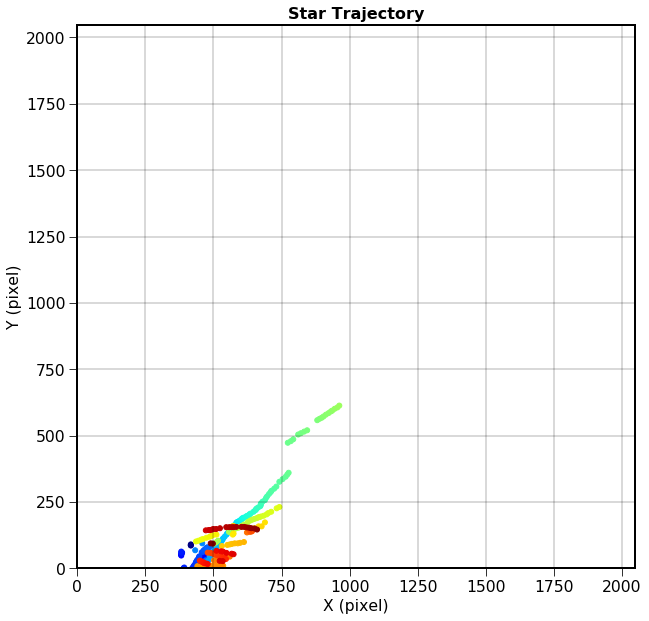

In [231]:
PlotXY(ifig,t["x0"],t["y0"])

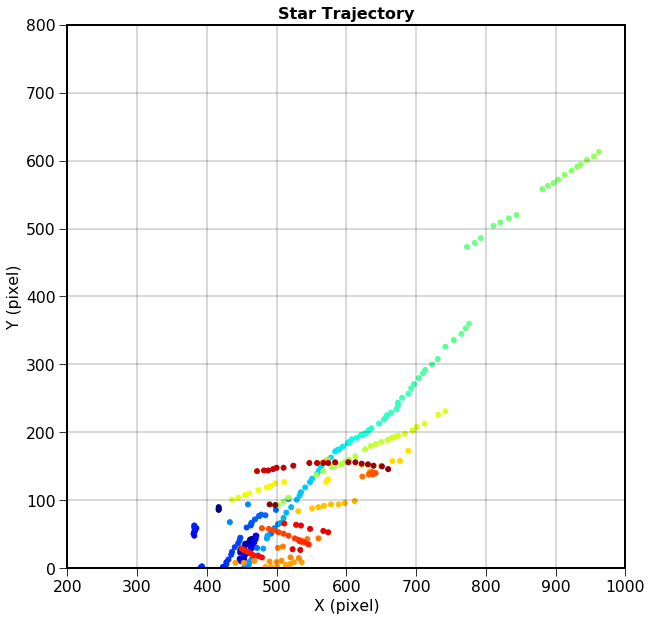

In [232]:
PlotXY(ifig,t["x0"],t["y0"],XMIN=200,XMAX=1000,YMIN=0,YMAX=800)

## Convert in datetime

In [233]:
#all_datetime = [Time(d,format='isot', scale='utc').to_datetime()  for d in t["date"]]

In [234]:
len(t)

287

In [235]:
len(new_all_datetime)

287

In [236]:
t[1]

idx,Npixcirc,fracpixcirc,sigcirc,errstatcirc,errannul,sigx,sigy,bkgsum,bkgaverpix,bkgstddevpix,airmass,x0,y0,date,file,starmag,bkgmag,starmagerr,bkgmagerr
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,object,str117,float32,float32,float32,float32
1,1937,0.9865,2.779e+06,761,2.504e+04,4.938,4.673,183848.64,93.63,12.92,1.543,417,86,2019-02-15T22:56:26.007,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red.fit,-16.11,-13.161152,0.009798,0.15277217


## Plot Star magnitude

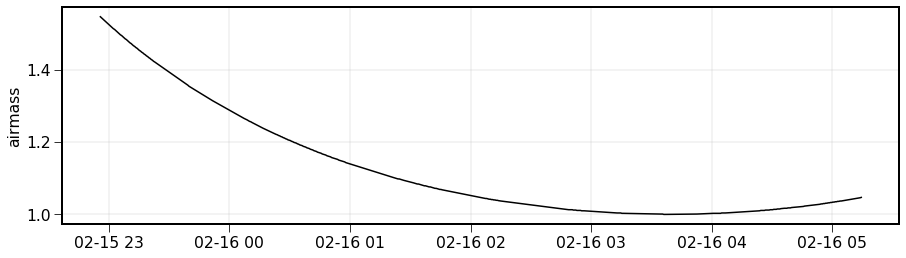

In [237]:
plt.figure(figsize=(15,4))
plt.plot(new_all_datetime,t["airmass"],'k-')
plt.ylabel("airmass")
plt.grid()

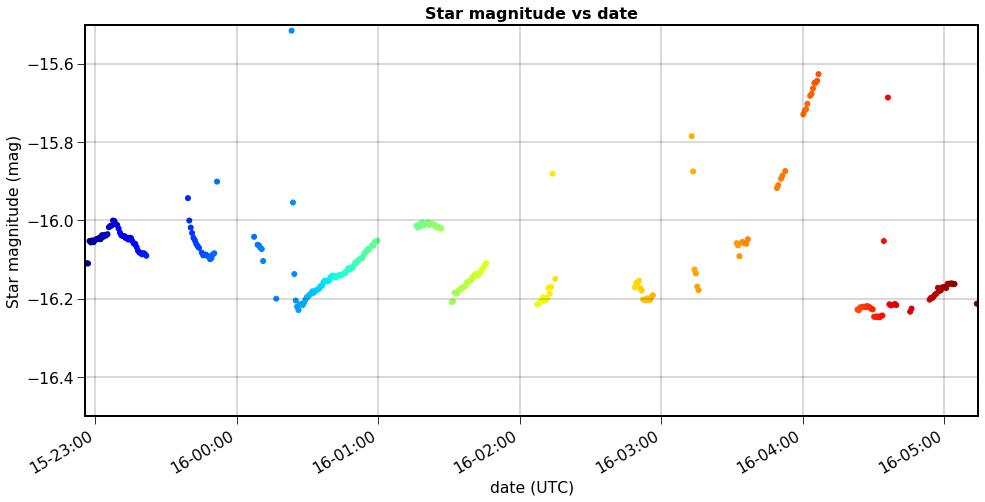

In [238]:
PlotStarmagvsUTC(ifig,new_all_datetime,t["starmag"],t["starmagerr"],YMIN=-16.5,YMAX=-15.5)

## Star and Background magnitude

In [239]:
t[1]

idx,Npixcirc,fracpixcirc,sigcirc,errstatcirc,errannul,sigx,sigy,bkgsum,bkgaverpix,bkgstddevpix,airmass,x0,y0,date,file,starmag,bkgmag,starmagerr,bkgmagerr
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,object,str117,float32,float32,float32,float32
1,1937,0.9865,2.779e+06,761,2.504e+04,4.938,4.673,183848.64,93.63,12.92,1.543,417,86,2019-02-15T22:56:26.007,/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red.fit,-16.11,-13.161152,0.009798,0.15277217


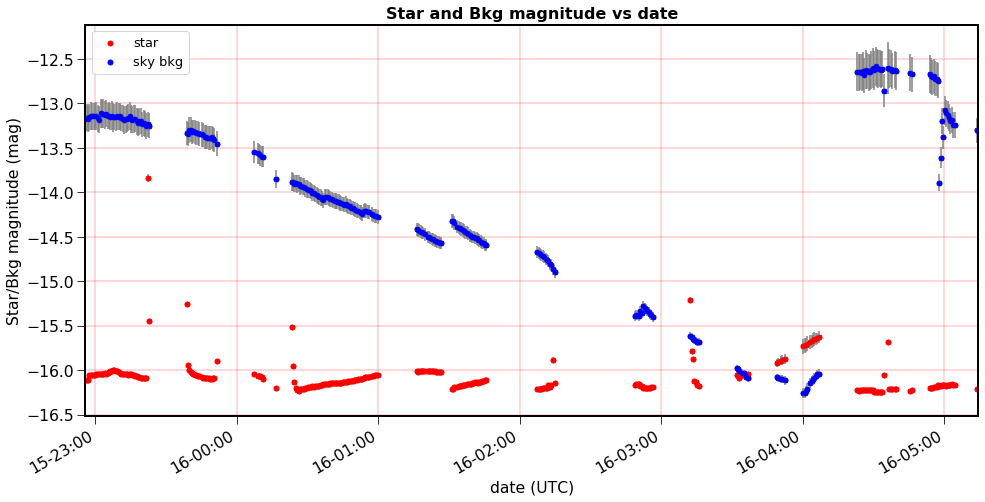

In [240]:
PlotStarmagBkgvsUTC(ifig,new_all_datetime,t["starmag"],t["bkgmag"],t["starmagerr"],t["bkgmagerr"])

## Star Magnitude vs X

Text(0.5, 1.0, 'Star magnitude vs X')

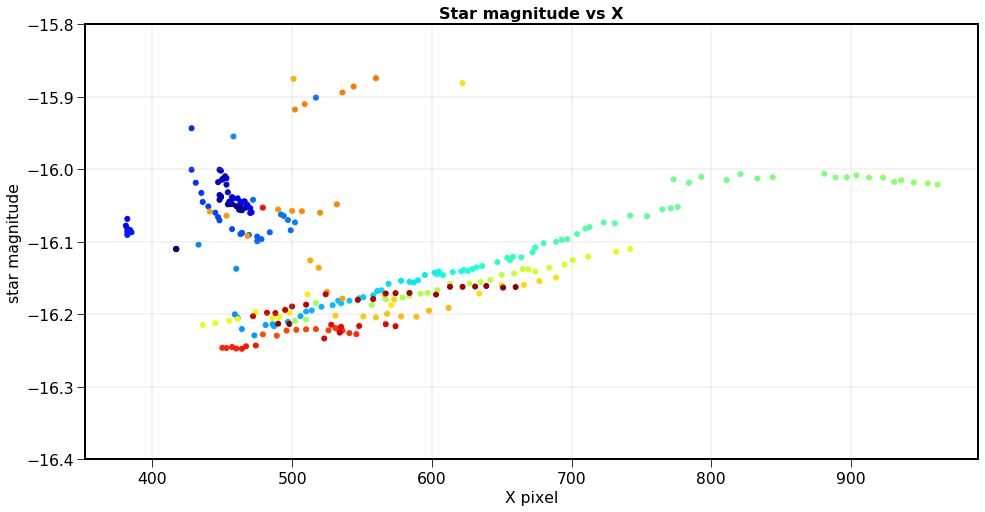

In [241]:
plt.figure(figsize=(16,8))
plt.scatter(t["x0"],t["starmag"],marker="o",c=new_all_colors)
plt.grid()
#plt.ylim(-16.25,-15.9)
plt.xlabel("X pixel")
plt.ylabel("star magnitude")
plt.ylim(-16.4,-15.8)
plt.title("Star magnitude vs X")

## Star Magnitude vs Y

Text(0.5, 1.0, 'Star magnitude vs Y')

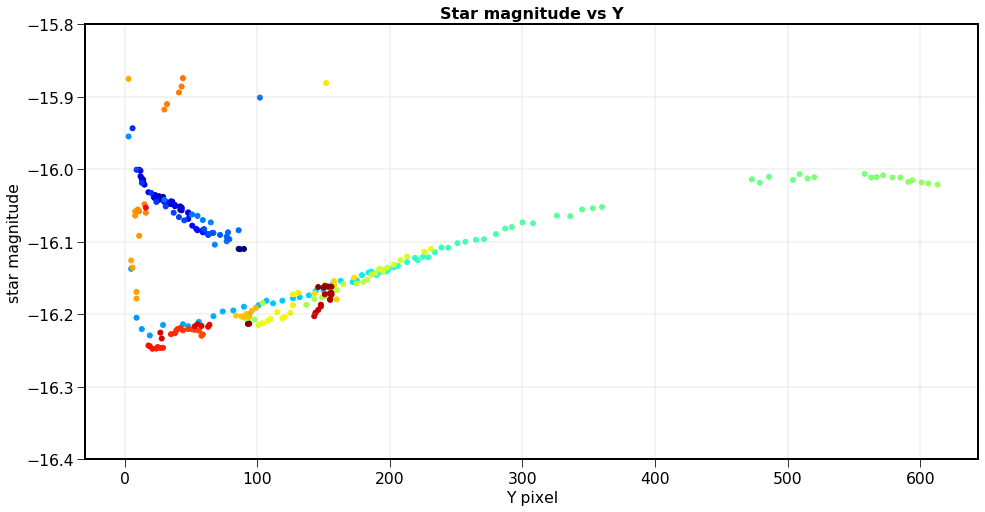

In [242]:
plt.figure(figsize=(16,8))
plt.scatter(t["y0"],t["starmag"],marker="o",c=new_all_colors)
plt.grid()
#plt.ylim(-16.25,-15.9)
plt.xlabel("Y pixel")
plt.ylabel("star magnitude")
plt.ylim(-16.4,-15.8)
plt.title("Star magnitude vs Y")

Text(0.5, 1.0, 'Star magnitude vs $D=\\sqrt{x^2+y^2}$ from Hologram center')

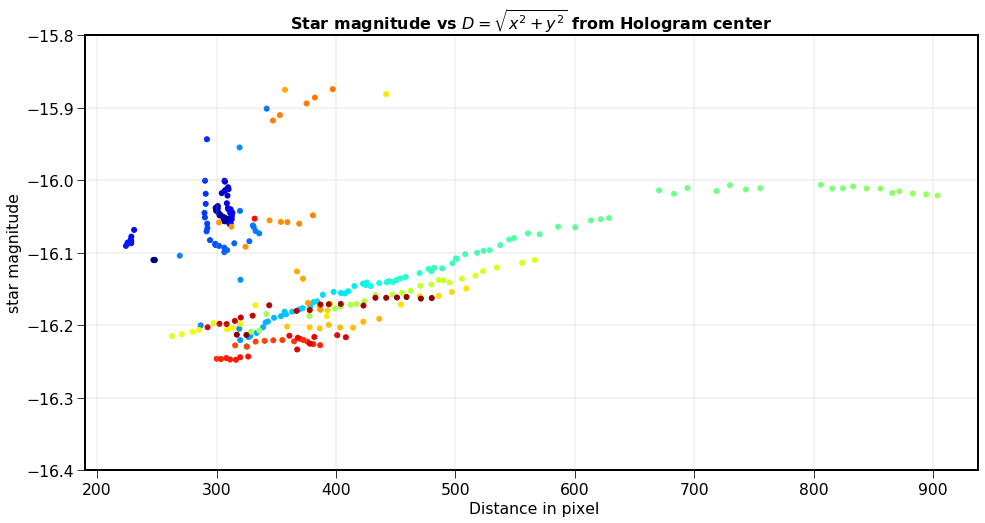

In [243]:
plt.figure(figsize=(16,8))
plt.scatter(np.sqrt((t["x0"]-180.)**2+(t["y0"]-160)**2),t["starmag"],marker="o",c=new_all_colors)
plt.grid()
#plt.ylim(-16.25,-15.9)
plt.xlabel(" Distance in pixel")
plt.ylabel("star magnitude")
plt.ylim(-16.4,-15.8)
plt.title("Star magnitude vs $D=\\sqrt{x^2+y^2}$ from Hologram center")

## Star magnitude vs airmass

Text(0.5, 1.0, 'Star magnitude vs airmass')

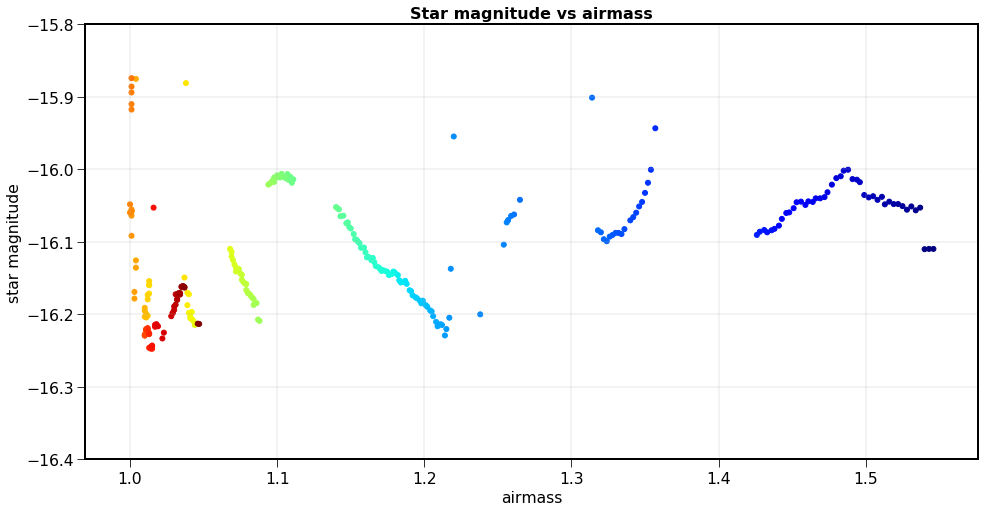

In [244]:
fig = plt.figure(num=ifig, figsize=(16, 8))
plt.scatter(t["airmass"],t["starmag"],marker="o",c=new_all_colors)
plt.grid()
#plt.ylim(-16.25,-15.9)
plt.xlabel("airmass")
plt.ylabel("star magnitude")
plt.ylim(-16.4,-15.8)
plt.title("Star magnitude vs airmass")

## Selection (x0,y0) 

In [245]:
#selected_idx=np.where(np.logical_and(t["starmag"]<-16.05,t["starmag"]>-16.06))[0]
selected_idx=np.where(np.logical_and(t["y0"]>140,t["y0"]<160))[0]

In [246]:
selected_idx

array([ 96,  97,  98, 159, 160, 161, 162, 163, 191, 193, 194, 195, 196,
       197, 231, 234, 235, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284])

In [247]:
t["date"][selected_idx][:6]

2019-02-16T00:35:38.871
2019-02-16T00:36:14.149
2019-02-16T00:36:49.428
2019-02-16T01:34:05.792
2019-02-16T01:34:41.093
2019-02-16T01:35:16.402


In [248]:
t["file"][selected_idx][:6]

/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_003538_871_HD116405_Filtre_None_bin1x1.36_red.fit
/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_003614_149_HD116405_Filtre_None_bin1x1.37_red.fit
/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_003649_428_HD116405_Filtre_None_bin1x1.38_red.fit
/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_013405_792_HD116405_Filtre_None_bin1x1.115_red.fit
/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_013441_093_HD116405_Filtre_None_bin1x1.116_red.fit
/Users/dagoret/DATA/PicDuMidiFev2019/prod_20190215_v4/T1M_20190216_013516_402_HD116405_Filtre_None_bin1x1.117_red.fit


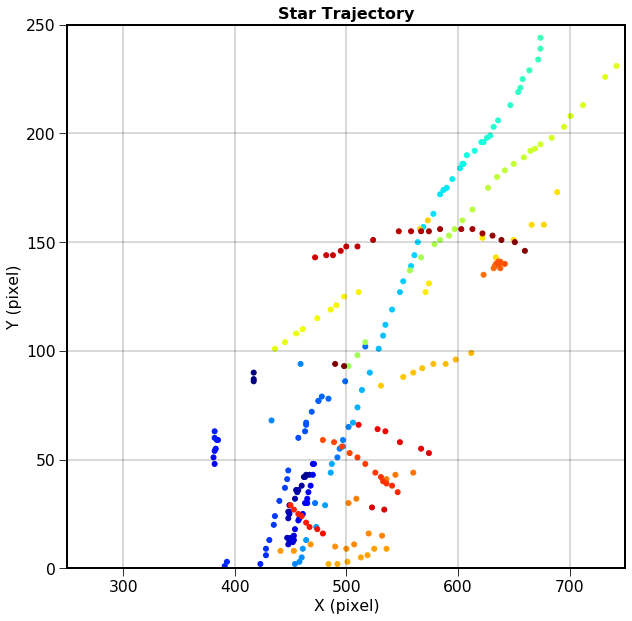

In [249]:
PlotXY(ifig,t["x0"],t["y0"],XMIN=250,XMAX=750,YMIN=0,YMAX=250)

## Selection of star position in a narrow region

In [265]:
XMIN=400
XMAX=600
YMIN=75
YMAX=125

In [266]:
theX=t["x0"].data
theY=t["y0"].data
themag=t["starmag"].data
themagerr=t["starmagerr"].data
thedate=t["date"].data
theairmass=t["airmass"].data

In [267]:
Selected_Indexes=np.where(np.logical_and(np.logical_and(theX>XMIN,theX<XMAX),np.logical_and(theY>YMIN,theY<YMAX)))[0]

In [268]:
Selected_Indexes

array([  0,   1,   2,  62,  63,  64,  65,  66,  67,  74,  87,  88,  89,
        90,  91,  92, 155, 156, 157, 180, 181, 182, 183, 184, 185, 186,
       199, 200, 201, 202, 203, 204, 205, 285, 286])

In [269]:
N=len(Selected_Indexes)

In [270]:
N

35

In [271]:
#jet = plt.get_cmap('jet')
#cNorm = colors.Normalize(vmin=0, vmax=N)
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [272]:
newX=theX[Selected_Indexes]
newY=theY[Selected_Indexes]
newmag=themag[Selected_Indexes]
newmagerr=themagerr[Selected_Indexes]
newdate=thedate[Selected_Indexes]
newairmass=theairmass[Selected_Indexes]
sel_colors=new_all_colors[Selected_Indexes]

In [273]:
new_datetime = [Time(d,format='isot', scale='utc').to_datetime()  for d in newdate]

### Selected trajectory

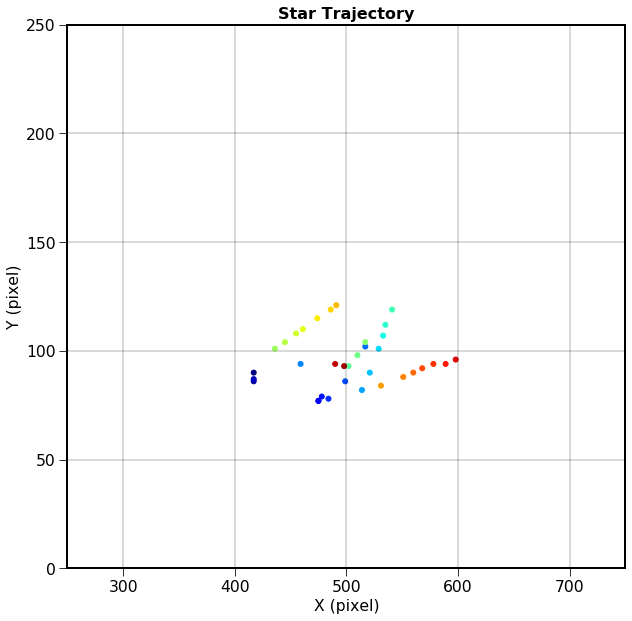

In [274]:
PlotXY(ifig,newX,newY,XMIN=250,XMAX=750,YMIN=0,YMAX=250)

### Magnitude distribution

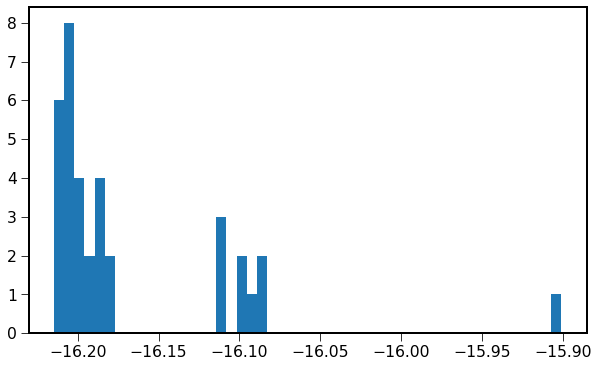

In [275]:
plt.figure(figsize=(10,6))
plt.hist(newmag,bins=50);

Text(0.5, 1.0, 'Star Magnitude vs X')

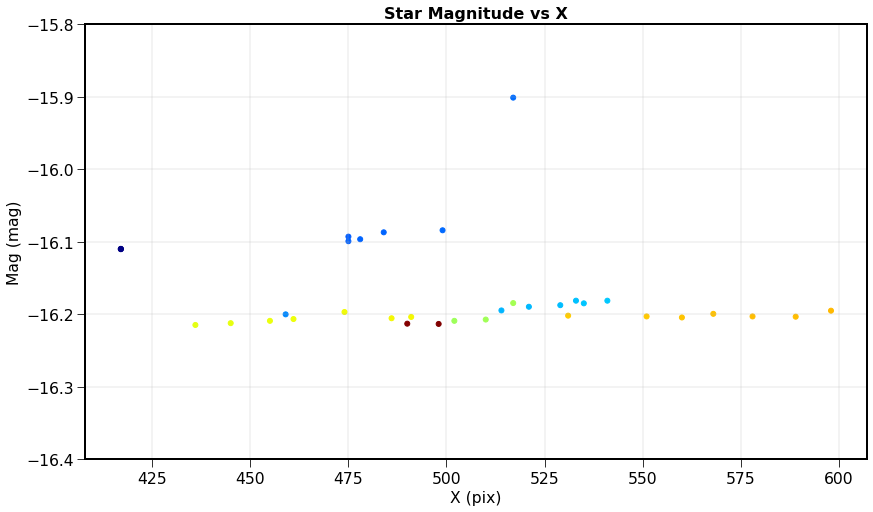

In [276]:
fig = plt.figure(num=ifig, figsize=(14, 8))
plt.scatter(newX,newmag,marker="o",c=sel_colors)
#plt.xlim(0,100)
plt.xlabel("X (pix)")
plt.ylabel("Mag (mag)")
plt.grid()
plt.ylim(-16.4,-15.8)
plt.title("Star Magnitude vs X")

Text(0.5, 1.0, 'Star Magnitude vs Y')

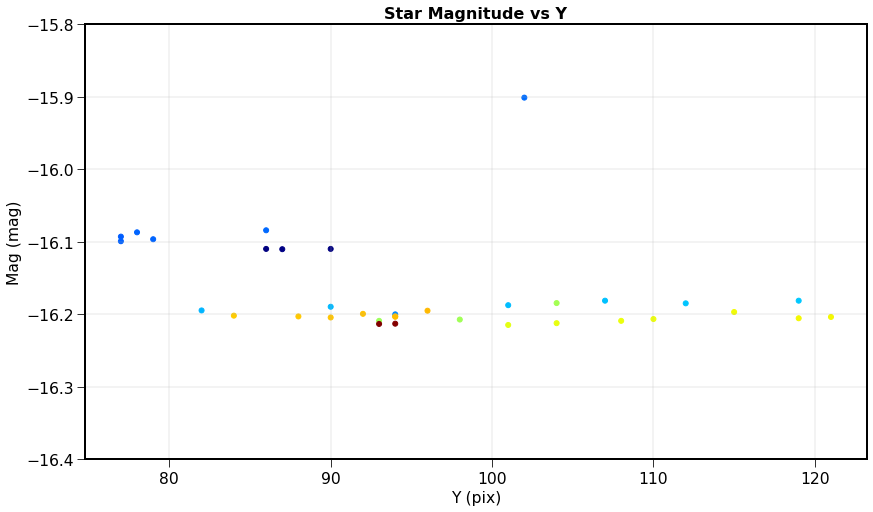

In [277]:
fig = plt.figure(num=ifig, figsize=(14, 8))
plt.scatter(newY,newmag,marker="o",c=sel_colors)
plt.xlabel("Y (pix)")
plt.ylabel("Mag (mag)")
plt.grid()
plt.ylim(-16.4,-15.8)
plt.title("Star Magnitude vs Y")

Text(0.5, 1.0, 'Star magnitude vs airmass')

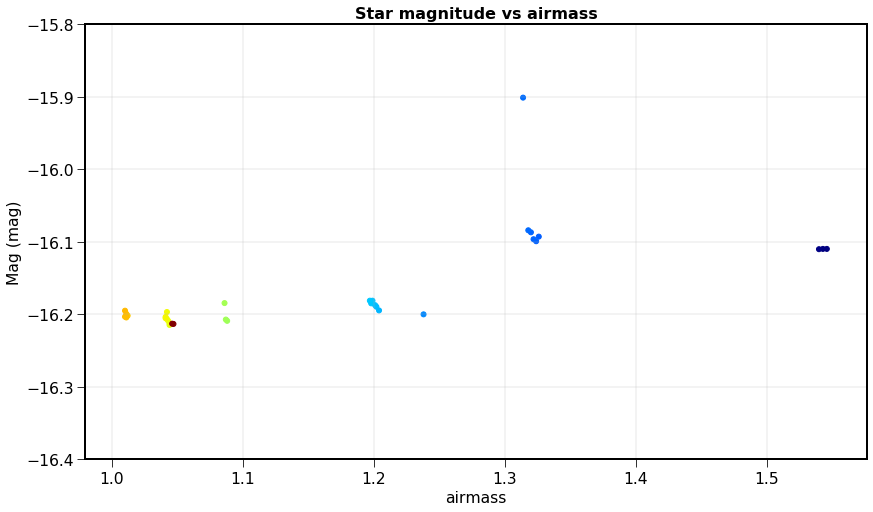

In [278]:
fig = plt.figure(num=ifig, figsize=(14, 8))
plt.scatter(newairmass,newmag,marker="o",c=sel_colors)
plt.xlabel("airmass")
plt.ylabel("Mag (mag)")
plt.grid()
plt.ylim(-16.4,-15.8)
plt.title("Star magnitude vs airmass")

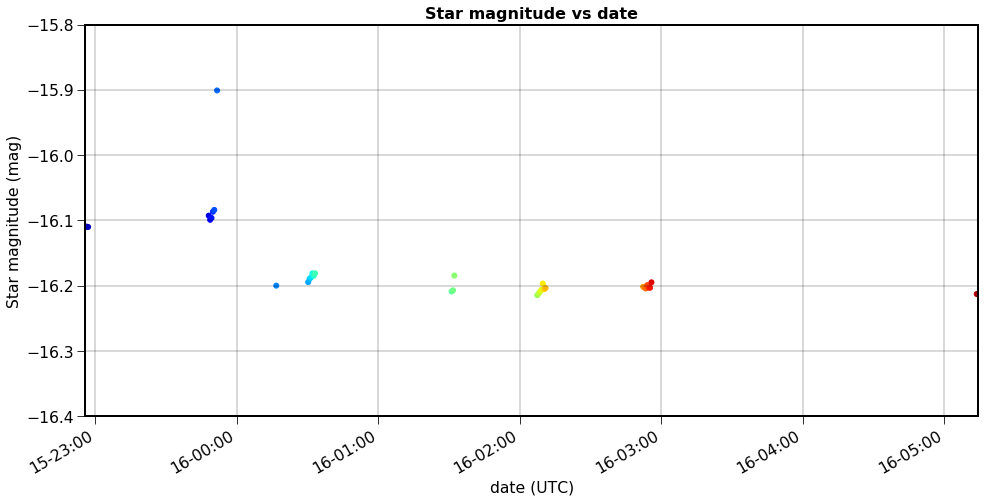

In [279]:
PlotStarmagvsUTC(ifig,new_datetime,newmag,newmagerr,YMIN=-16.4,YMAX=-15.8)